In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

In [6]:
table = pd.read_html('https://en.wikipedia.org/wiki/Lists_of_earthquakes')

In [10]:
df = pd.DataFrame(table[3])

In [12]:
df.to_csv('deadliest_earthquake.csv', index=False)

In [2]:
df = pd.read_csv('deadliest_earthquake.csv')

In [3]:
df.head()

,Year,Magnitude,Location,Depth,MMI,Notes,Event,Date
0,1960,5.8,"Morocco, Souss-Massa",15.0,X,Worst earthquake in Moroccan history. Between ...,1960 Agadir earthquake,February 29
1,1961,6.4,"Iran, Fars Province",15.0,VIII,60 people were killed.,1961 Fars earthquake,June 11
2,1962,7.0,"Iran, Qazvin Province",10.0,IX,"12,225 killed, and major property damage was c...",1962 Buin Zahra earthquake,September 1
3,1963,6.0,"Yugoslavia, Republic of North Macedonia",15.0,X,"1,070 people perished and 80 percent of Skopje...",1963 Skopje earthquake,July 26
4,1964,9.2,"United States, Alaska",25.0,XI,It is the largest earthquake ever recorded in ...,1964 Alaska earthquake,March 28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Magnitude  63 non-null     object 
 2   Location   63 non-null     object 
 3   Depth      63 non-null     float64
 4   MMI        63 non-null     object 
 5   Notes      63 non-null     object 
 6   Event      63 non-null     object 
 7   Date       63 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.1+ KB


In [10]:
df.Year = df.Year.apply(str)
df.Magnitude = df.Magnitude.apply(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       61 non-null     object 
 1   Magnitude  61 non-null     float64
 2   Location   61 non-null     object 
 3   Depth      61 non-null     float64
 4   MMI        61 non-null     object 
 5   Notes      61 non-null     object 
 6   Event      61 non-null     object 
 7   Date       61 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.3+ KB


In [11]:
df.Date = df.Date + ' ' + df.Year

In [12]:
df.loc[df.Year == '1981']

,Year,Magnitude,Location,Depth,MMI,Notes,Event,Date


In [13]:
# removed index 21 and 42 because of the years 1981, 2002 had the same values
df.drop(index=[42, 21], inplace=True)

KeyError: '[42, 21] not found in axis'

In [14]:
df['Date_test'] = pd.to_datetime(df.Date, format='%B %d %Y')

In [15]:
temp_df = df.set_index('Year')

In [16]:
temp_df.to_json('deadliest_earthquake.json', orient='index')

In [17]:
df.head()

,Year,Magnitude,Location,Depth,MMI,Notes,Event,Date,Date_test
0,1960,5.8,"Morocco, Souss-Massa",15.0,X,Worst earthquake in Moroccan history. Between ...,1960 Agadir earthquake,February 29 1960,1960-02-29
1,1961,6.4,"Iran, Fars Province",15.0,VIII,60 people were killed.,1961 Fars earthquake,June 11 1961,1961-06-11
2,1962,7.0,"Iran, Qazvin Province",10.0,IX,"12,225 killed, and major property damage was c...",1962 Buin Zahra earthquake,September 1 1962,1962-09-01
3,1963,6.0,"Yugoslavia, Republic of North Macedonia",15.0,X,"1,070 people perished and 80 percent of Skopje...",1963 Skopje earthquake,July 26 1963,1963-07-26
4,1964,9.2,"United States, Alaska",25.0,XI,It is the largest earthquake ever recorded in ...,1964 Alaska earthquake,March 28 1964,1964-03-28


In [18]:
df.Magnitude.to_numpy()

array([5.8, 6.4, 7. , 6. , 9.2, 7.4, 6.8, 6.6, 7.1, 6.4, 7.9, 6.9, 6.6,
       7.6, 7.1, 6.7, 7.6, 7.5, 7.4, 8.2, 7.3, 6.2, 6.6, 6.3, 8. , 5.7,
       7.1, 6.8, 5.3, 7.4, 6.8, 7.8, 6.3, 6.8, 6.9, 6.6, 7.3, 6.6, 7.6,
       7.9, 7.7, 6.6, 9.1, 7.6, 6.4, 8. , 8. , 7.6, 7. , 9.1, 6.4, 7.7,
       6.2, 7.8, 7.8, 7.3, 7.5, 6.4, 7. , 7.2, 5.3])

In [23]:
def plot_my_timeline(date, magnitude, event, location, vline_levels, title):
    marker_size = np.array([n ** 2.8 for n in magnitude]).astype(float)
    fig, ax = plt.subplots(figsize=(25, 15))
    ax.set(title=title)

    # the date_test here is the place where the graph should be
    # 0 is the min
    # levels is the maximum here.
    ax.vlines(date, 0, levels, color="tab:red")

    ax.plot(date, np.zeros_like(date))
    ax.scatter(date, np.zeros_like(date), s=marker_size, edgecolors='k', c='lightgray')
    plt.legend(['', '', 'Magnitude'])

    for d, m, loc, lev in zip(date, magnitude, location, levels):
        ax.annotate(f'{loc} ({m})', xy=(d, lev), xytext=(-3, np.sign(lev)*6), textcoords="offset points",
                    horizontalalignment="center",
                    verticalalignment="bottom" if lev > 0 else "top", wrap=True)

    ax.set_xticks(date)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)


    ax.margins(y=0.1)
    plt.show()


In [21]:
levels = np.tile([-10, 10, -8, 8, -6, 6, -3, 3, -1, 1],
                 int(np.ceil(len(df.Date_test)/6)))[:len(df.Date_test)]

# marker_size = np.array([n ** 2.8 for n in df.Magnitude]).astype(float)

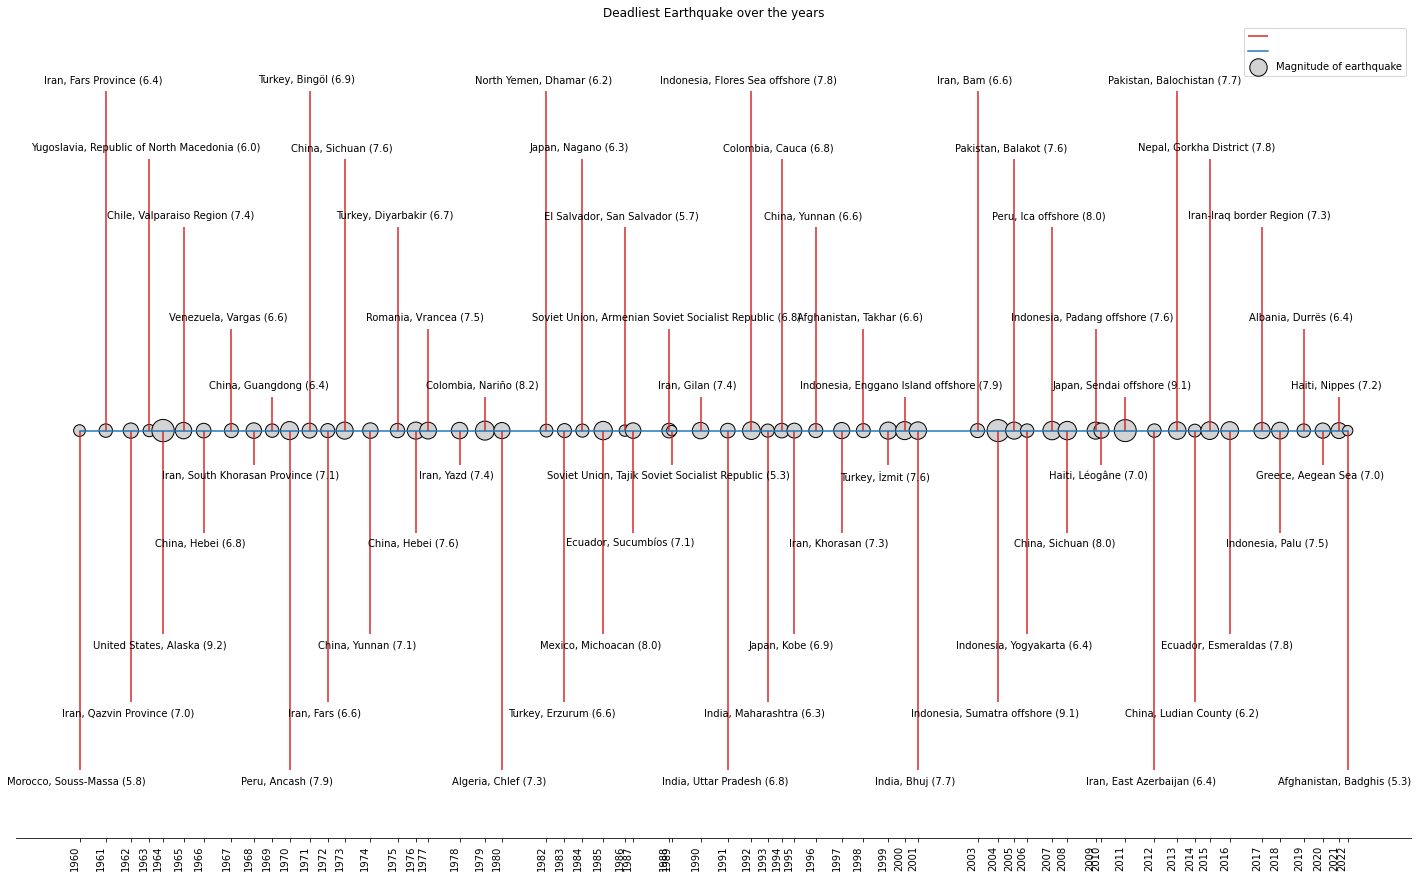

In [105]:
# fig, ax = plt.subplots(figsize=(25, 15))
#
# ax.set(title='Deadliest Earthquake over the years')
#
# # the date_test here is the place where the graph should be
# # 0 is the min
# # levels is the maximum here.
# ax.vlines(df.Date_test, 0, levels, color="tab:red")
#
# ax.plot(df.Date_test, np.zeros_like(df.Date_test))
# ax.scatter(df.Date_test, np.zeros_like(df.Date_test), s=marker_size, edgecolors='k', c='lightgray')
# plt.legend([None, None, 'Magnitude of earthquake'])
#
# for d, m, loc, lev in zip(df.Date_test, df.Magnitude, df.Location, levels):
#     ax.annotate(f'{loc} ({m})', xy=(d, lev), xytext=(-3, np.sign(lev)*6), textcoords="offset points",
#                 horizontalalignment="center",
#                 verticalalignment="bottom" if lev > 0 else "top", wrap=True)
#
# ax.set_xticks(df.Date_test)
# plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
#
# ax.yaxis.set_visible(False)
# ax.spines[["left", "top", "right"]].set_visible(False)
#
#
# ax.margins(y=0.1)
# plt.show()

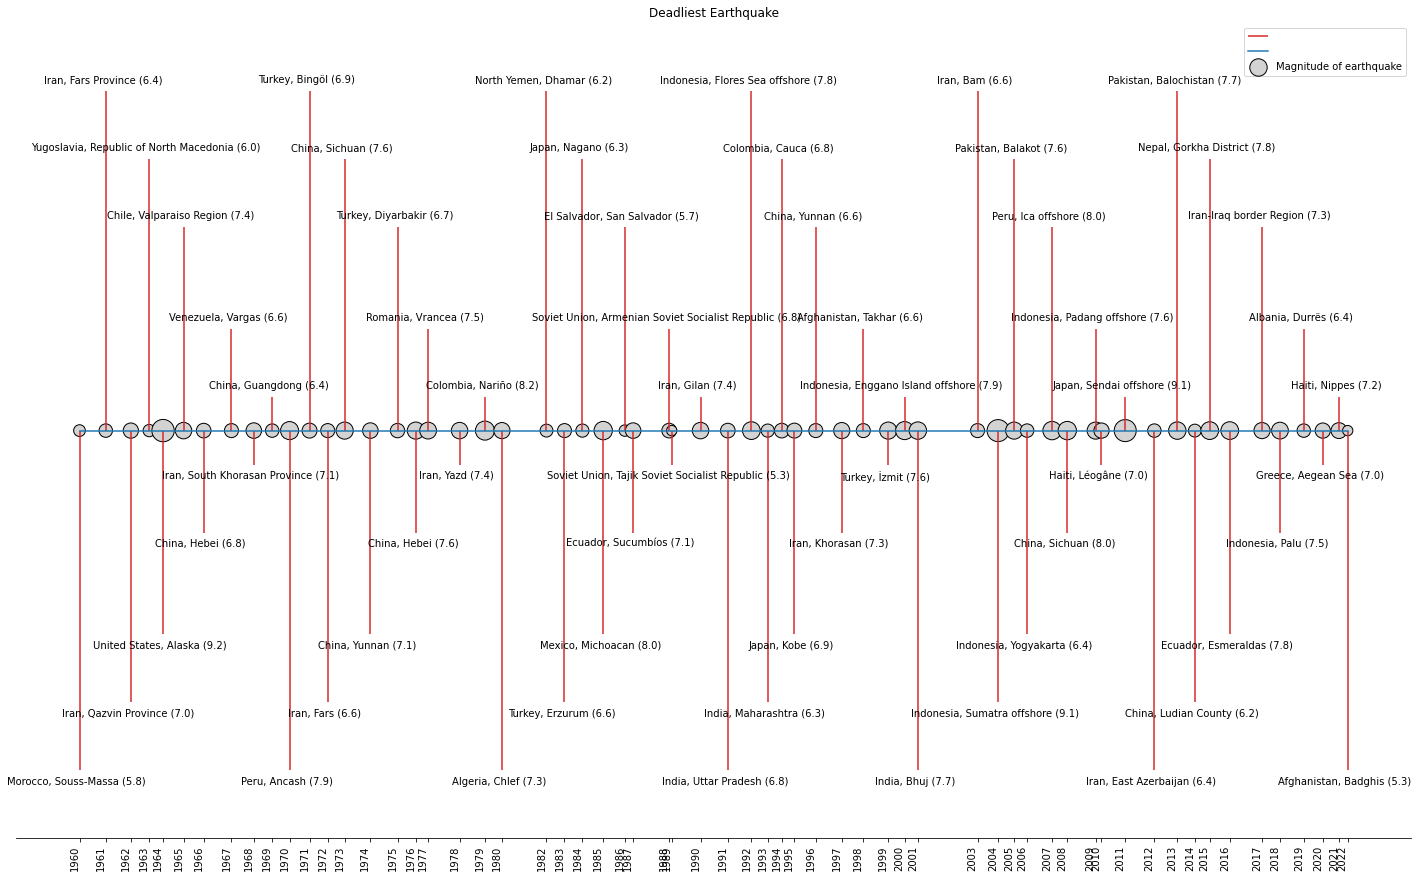

In [22]:
plot_my_timeline(df.Date_test, df.Magnitude, df.Event, df.Location, levels, 'Deadliest Earthquake')

In [3]:
df = pd.read_csv('../Free_Banking_Era_to_the_Great_Depression.csv')

In [5]:
df

,Name,Dates[b],Duration,Time since previous recession,Business activity [c],Trade & industrial activity[c],Characteristics
0,1836–1838 recession,—,~2 years,~2 years,–32.8%,—,A sharp downturn in the American economy was c...
1,late 1839–late 1843 recession,—,~4 years,~1 year,–34.3%,—,This was one of the longest and deepest depres...
2,1845–late 1846 recession,—,~1 year,~2 years,−5.9%,—,This recession was mild enough that it may hav...
3,1847–1848 recession,late 1847 – late 1848,~1 year,~1 year,−19.7%,—,The Cleveland Trust Company Index declined 19....
4,1853–1854 recession,1853 – December 1854,~1 year,~5 years,−18.4%,—,"Interest rates rose in this period, contributi..."
5,Panic of 1857,June 1857 – December 1858,1 year 6 months,2 years 6 months,−23.1%,—,Failure of the Ohio Life Insurance and Trust C...
6,1860–1861 recession,October 1860 – June 1861,8 months,1 year 10 months,−14.5%,—,There was a mild recession before the American...
7,1865–1867 recession,April 1865 – December 1867,2 years 8 months,3 years 10 months,−23.8%,—,"The American Civil War ended in April 1865, an..."
8,1869–1870 recession,June 1869 – December 1870,1 year 6 months,1 year 6 months,−9.7%,—,"A few years after the Civil War, a short reces..."
9,Panic of 1873 and the Long Depression,October 1873 – March 1879,5 years 5 months,2 years 10 months,−33.6% (−27.3%)[c],—,Economic problems in Europe prompted the failu...


In [6]:
df_earth = pd.read_csv('../Deadliest_earthquakes_by_year.csv')

In [7]:
df_earth

,Year,Magnitude,Location,Depth (km),MMI,Notes,Event,Date,date,event,magnitude,year,magnitude_calc
0,1960,5.8,"Morocco, Souss-Massa",15.0,X,Worst earthquake in Moroccan history. Between ...,1960 Agadir earthquake,February 29,1960-01-01,1960 Agadir earthquake,5.8,1960,5.8
1,1961,6.4,"Iran, Fars Province",15.0,VIII,60 people were killed.,1961 Fars earthquake,June 11,1961-01-01,1961 Fars earthquake,6.4,1961,6.4
2,1962,7.0,"Iran, Qazvin Province",10.0,IX,"12,225 killed, and major property damage was c...",1962 Buin Zahra earthquake,September 1,1962-01-01,1962 Buin Zahra earthquake,7.0,1962,7.0
3,1963,6.0,"Yugoslavia, Republic of North Macedonia",15.0,X,"1,070 people perished and 80 percent of Skopje...",1963 Skopje earthquake,July 26,1963-01-01,1963 Skopje earthquake,6.0,1963,6.0
4,1964,9.2,"United States, Alaska",25.0,XI,It is the largest earthquake ever recorded in ...,1964 Alaska earthquake,March 28,1964-01-01,1964 Alaska earthquake,9.2,1964,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,7.5,"Indonesia, Palu",20.0,X,"At least 4,340 people killed, 10,679 and 1.5 m...",2018 Sulawesi earthquake and tsunami,September 28,2018-01-01,2018 Sulawesi earthquake and tsunami,7.5,2018,7.5
59,2019,6.4,"Albania, Durrës",10.0,VIII,"At least 51 people killed, 3,000 people injure...",2019 Albania earthquake,November 26,2019-01-01,2019 Albania earthquake,6.4,2019,6.4
60,2020,7.0,"Greece, Aegean Sea",21.0,VIII,"At least 119 people killed, 1,096 people were ...",2020 Aegean Sea earthquake,October 30,2020-01-01,2020 Aegean Sea earthquake,7.0,2020,7.0
61,2021,7.2,"Haiti, Nippes",10.0,IX,"At least 2,248 people killed, 12,763 people we...",2021 Haiti earthquake,August 14,2021-01-01,2021 Haiti earthquake,7.2,2021,7.2


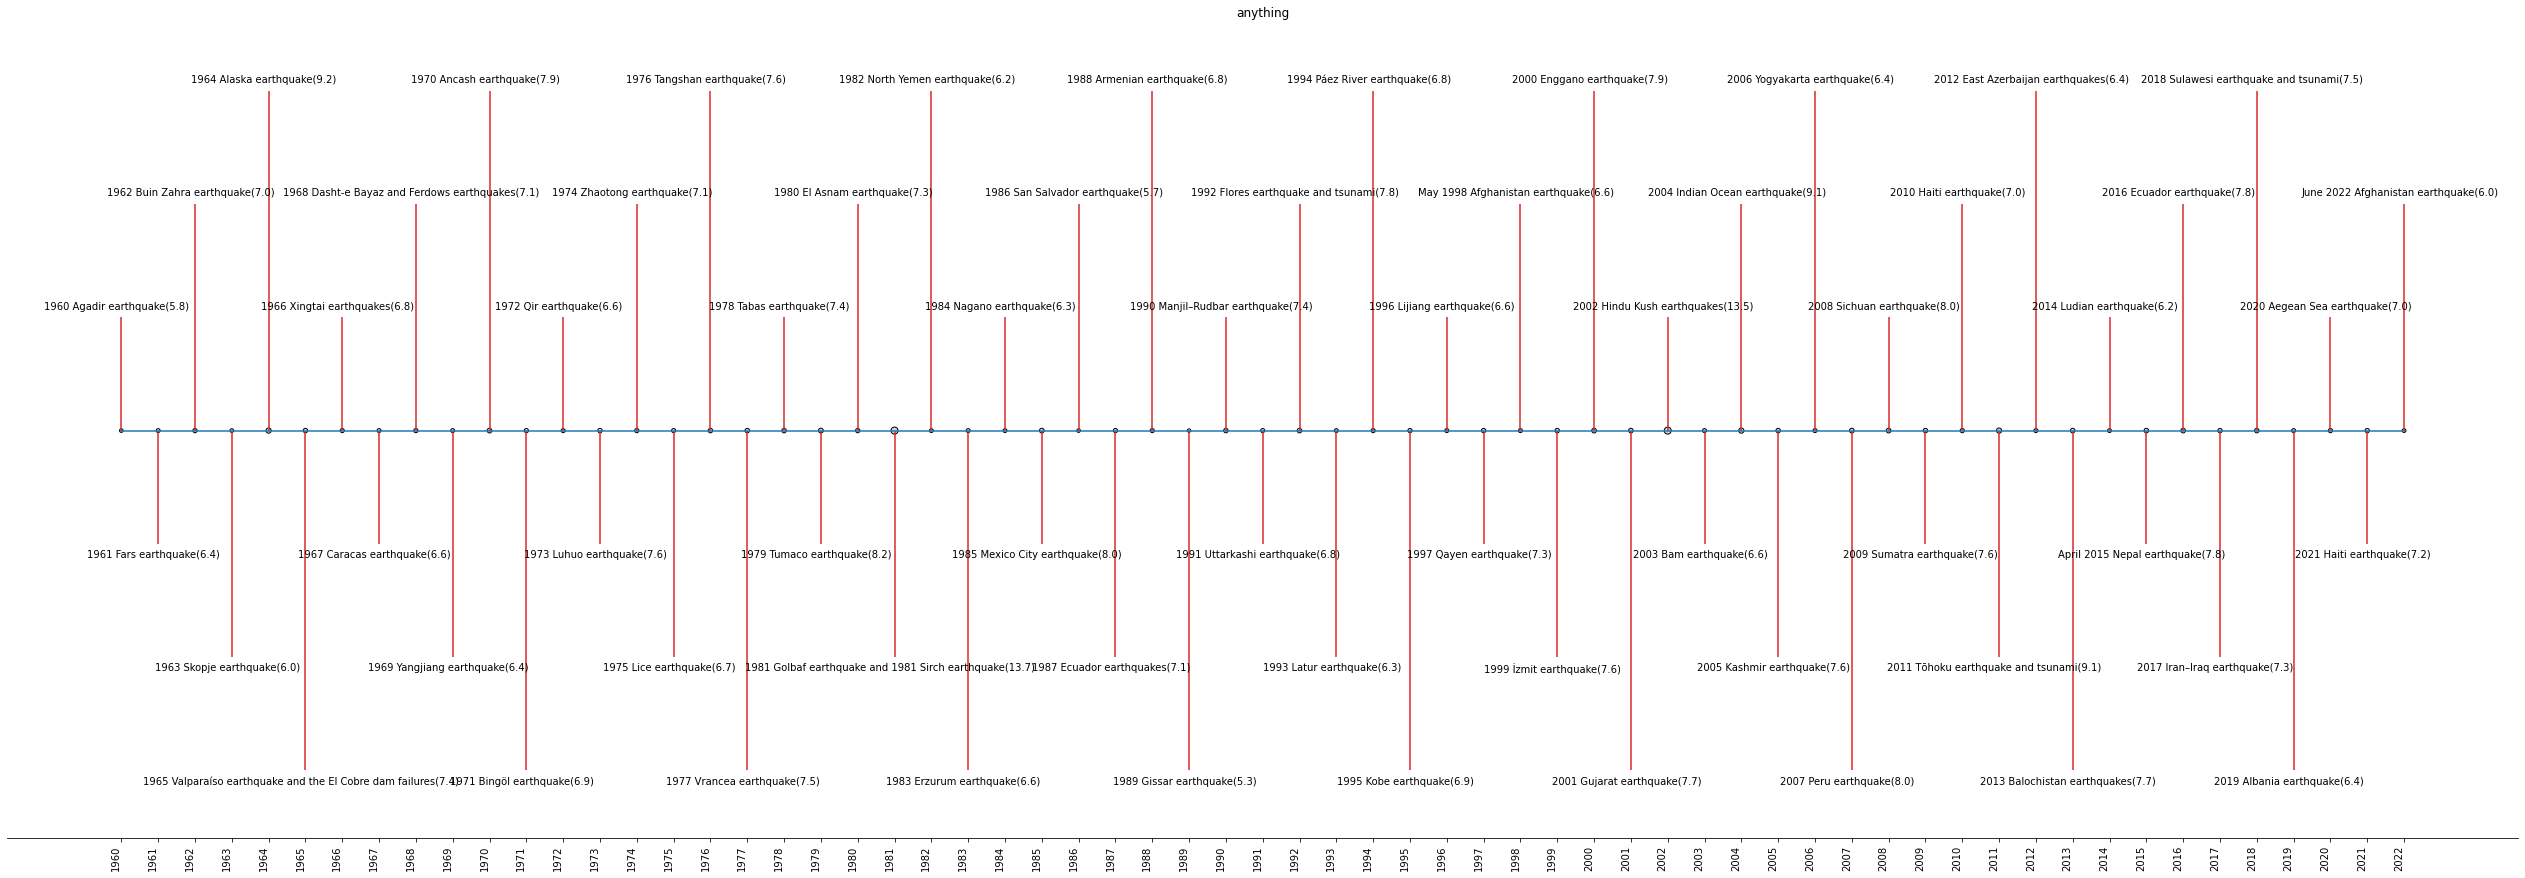

In [10]:
from Timeline import TimelineVisualiser

TimelineVisualiser(df_earth, 'anything').create_my_timeline()

In [11]:
df_earth.iloc[21]

Year                                                           1981
Magnitude                                                 6.6 & 7.1
Location                                               Iran, Kerman
Depth (km)                                                     33.0
MMI                                                       VIII & IX
Notes             Both earthquakes killed at least 3,000 people....
Event              1981 Golbaf earthquake and 1981 Sirch earthquake
Date                                            June 11 and July 28
date                                                     1981-01-01
event              1981 Golbaf earthquake and 1981 Sirch earthquake
magnitude                                                 6.6 & 7.1
year                                                           1981
magnitude_calc                                                 13.7
Name: 21, dtype: object

In [27]:
event = df_earth.iloc[21].event

In [36]:
event

'1981 Golbaf earthquake and 1981 Sirch earthquake'

In [40]:
splitted_event = event.split(' ')

In [63]:
fixed_string = [val + '/n' if (i + 1) % 3 == 0 else val for i, val in enumerate(splitted_event)]

In [65]:
' '.join(fixed_string)

'1981 Golbaf earthquake/n and 1981 Sirch/n earthquake'

In [15]:
length_of = len(event)

In [22]:
times = int(np.floor(length_of/ 15))

In [23]:
times

3

In [24]:
for i in range(1, times + 1):
    string_to_stop = i * 15
    event = event[:string_to_stop]+'\n'+event[string_to_stop:]

In [25]:
event

'1981 Golbaf ear\nthquake and 19\n81 Sirch earth\nquake'